***text preprocessing addresses issues like :***
- Lowercase letters.
- Removing HTML tags.
- Removing URLs.
- Removing punctuation.
- Chat Words Treatment.
- Spelling Correction.
- Removing stop words
- Handling Emojies
- Tokenization
- Stemming
- Lemmatization

***We Will discuss the Solutions to Handles the above mentioned Issues.***

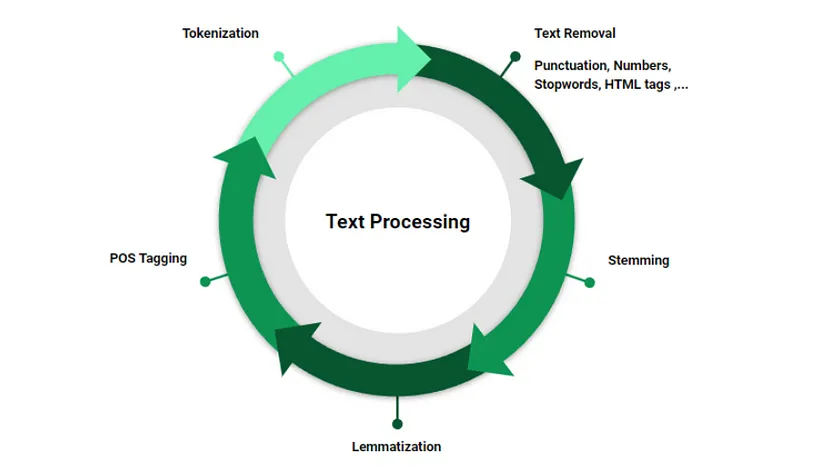

In [1]:
# Import Basis Libraries    
import pandas as pd
df = pd.read_csv('/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv')
# rename column
df.rename(columns = {'label (depression result)':'Sentiment'}, inplace = True)
df.rename(columns = {'message to examine':'review'}, inplace = True)
# Drop Index Column
df.drop('Index',axis=1,inplace=True)

In [2]:
# Head
df.head()

,review,Sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">1. LoweCasing Text</p>


***Lowercasing text in NLP preprocessing involves converting all letters in a text to lowercase. This step is essential for standardizing text data because it treats words with different cases (e.g., "Word" and "word") as the same, reducing vocabulary size and improving model efficiency. It ensures consistency in word representations, making it easier for algorithms to recognize patterns and associations. For example, "The" and "the" are treated as identical after lowercasing. This normalization simplifies subsequent processing steps, such as tokenization and feature extraction, leading to more accurate and robust NLP models.***


In [3]:
# Pick any random Review 
df['review'][3]

"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though. "

***if we have a Single Text or Sentence we can Lowercase it by using lower() func of Python.***

In [4]:
# Lower Casing the review
df['review'][3].lower()

"@lapcat need to send 'em to my accountant tomorrow. oddly, i wasn't even referring to my taxes. those are supporting evidence, though. "

***We can also Lowercase the Whole Corpus by using lower() function of Python.***

In [5]:
df['review'] = df['review'].str.lower()
df.head()

,review,Sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat need to send 'em to my accountant tomo...,0
4,add me on myspace!!! myspace.com/lookthunder,0


***Now we see all the sentences in the corpus are in lowercase.***

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">2. Remove HTML Tags</p>


***Removing HTML tags is an essential step in NLP text preprocessing to ensure that only meaningful textual content is analyzed. HTML tags contain formatting information and metadata irrelevant to linguistic analysis. Including these tags can introduce noise and distort the analysis results. Removing HTML tags helps to extract pure textual data, making it easier to focus on the actual content of the text. This step is particularly crucial when dealing with web data or documents containing HTML markup, as it ensures that the extracted text accurately represents the intended linguistic information for NLP tasks.***

***We can simply remove HTML tags by using the Regular Expressions.***

In [6]:
# Import Regular Expression
import re

# Function to remove HTML Tags
def remove_html_tags(text):
    """This creates a regex pattern that matches any text enclosed in angle brackets (< >), 
    which are typical for HTML tags. The .*? part ensures that the match is non-greedy, 
    meaning it will match the smallest possible text between the angle brackets."""
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [7]:
# Suppose we have a text Which Contains HTML Tags 
text = "<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"
text

"<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"

In [8]:
# Apply Function to Remove HTML Tags.
remove_html_tags(text)

' Movie 1 Actor - Aamir Khan Click here to download'

***See How the Code perform well and clean the text from the HTML Tags , We can Also Apply this Function to Whole Corpus.***

In [9]:
# Apply Function to Remove HTML Tags in our Dataset Colum Review.
df['review'] = df['review'].apply(remove_html_tags)

In [10]:
df

,review,Sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat need to send 'em to my accountant tomo...,0
4,add me on myspace!!! myspace.com/lookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression! everyo...,1


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">3. Remove URLs</p>

***In NLP text preprocessing, removing URLs is essential to eliminate irrelevant information that doesn't contribute to linguistic analysis. URLs contain website addresses, hyperlinks, and other web-specific elements that can skew the analysis and confuse machine learning models. By removing URLs, the focus remains on the textual content relevant to the task at hand, enhancing the accuracy of NLP tasks such as sentiment analysis, text classification, and information extraction. This step streamlines the dataset, reduces noise, and ensures that the model's attention is directed towards meaningful linguistic patterns and structures within the text.***

In [11]:
# Here We also Use Regular Expressions to Remove URLs from Text or Whole Corpus.
def remove_url(text):
    """https?://: This part matches URLs that start with http:// or https://. 
    The s? makes the s optional, so it will match both http and https.
    \S+: This matches one or more non-whitespace characters, which typically form 
    the rest of the URL after the http:// or https://.
    |: This is the OR operator in regular expressions. It allows matching either 
    the pattern before it or the pattern after it.
    www\.\S+: This part matches URLs that start with www.. 
    The \. is used to escape the dot, ensuring it matches a literal dot. Again, \S+ matches the rest of the URL."""
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [12]:
df['review'] = df['review'].apply(remove_url)

In [13]:
df

,review,Sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga,0
2,@comeagainjen -,0
3,@lapcat need to send 'em to my accountant tomo...,0
4,add me on myspace!!! myspace.com/lookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [15]:
# Suppose we have the FOllowings Text With URL.
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click https://www.kaggle.com/campusx/notebook8223fc1abb to search check www.google.com'

In [16]:
# Lets Remove The URL by Calling Function
print(remove_url(text1))
print(remove_url(text2))
print(remove_url(text3))
print(remove_url(text4))

Check out my notebook 
Check out my notebook 
Google search here 
For notebook click  to search check 


***Here How the function beatuifully remove the URLs from the Text . We Can Simply Call this Function on Whole Corpus to Remove URLs.***

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">4. Remove Punctuations</p>


***Removing punctuation marks is essential in NLP text preprocessing to enhance the accuracy and efficiency of analysis. Punctuation marks like commas, periods, and quotation marks carry little semantic meaning and can introduce noise into the dataset. By removing them, the text becomes cleaner and more uniform, making it easier for machine learning models to extract meaningful features and patterns. Additionally, removing punctuation aids in standardizing the text, ensuring consistency across documents and improving the overall performance of NLP tasks such as sentiment analysis, text classification, and named entity recognition.***

In [14]:
# From String we Imorts Punctuation.
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# Storing Punctuation in a Variable
punc = string.punctuation

In [18]:
# The code defines a function, remove_punc1, that takes a text input and removes all punctuation characters from it using
# the translate method with a translation table created by str.maketrans. This function effectively cleanses the text of punctuation symbols.
def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

In [20]:
# Text With Punctuation.
text = "The quick brown fox jumps over the lazy dog. However, the dog doesn't seem impressed! Oh no, it just yawned. How disappointing! Maybe a squirrel would elicit a reaction. Alas, the fox is out of luck."
text

"The quick brown fox jumps over the lazy dog. However, the dog doesn't seem impressed! Oh no, it just yawned. How disappointing! Maybe a squirrel would elicit a reaction. Alas, the fox is out of luck."

In [21]:
# Remove Punctuation.
remove_punc(text)

'The quick brown fox jumps over the lazy dog However the dog doesnt seem impressed Oh no it just yawned How disappointing Maybe a squirrel would elicit a reaction Alas the fox is out of luck'

In [19]:
df['review'] = df['review'].apply(remove_punc)
df

,review,Sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga,0
2,comeagainjen,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


***Hence the function removes the punctuations from the text and we can also use this function to remove the punctuations from the corpus.***

In [19]:
# Exmaple on whole Dataset.
print(df['review'][9])

# Remove Punctuation
remove_punc(df['review'][9])

@dananner night, darlin'!  sweet dreams to you 


'dananner night darlin  sweet dreams to you '

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">5. Handling ChatWords</p>


***Handling ChatWords, also known as internet slang or informal language used in online communication, is important in NLP text preprocessing to ensure accurate analysis and understanding of text data. By converting ChatWords into their standard English equivalents or formal language equivalents, NLP models can effectively interpret the meaning of the text. This preprocessing step helps in maintaining consistency, improving the quality of input data, and enhancing the performance of NLP tasks such as sentiment analysis, chatbots, and information retrieval systems. Ultimately, handling ChatWords ensures better comprehension and more reliable results in NLP applications.***

In [20]:
# Here Come ChatWords Which i Get from a Github Repository
# Repository Link : https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}


***The code defines a function, chat_conversion, that replaces text with their corresponding chat acronyms from a predefined dictionary. It iterates through each word in the input text, checks if it exists in the dictionary, and replaces it if found. The modified text is then returned.***

In [21]:
# Function
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

In [22]:
# Text
text = 'IMHO he is the best'
text1 = 'FYI Islamabad is the capital of Pakistan'
# Calling function
print(chat_conversion(text))
print(chat_conversion(text1))

In My Honest/Humble Opinion he is the best
For Your Information Islamabad is the capital of Pakistan


In [23]:
df['review'] = df['review'].apply(chat_conversion)
df

,review,Sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga,0
2,comeagainjen,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


***Well this is how we Handle ChatWords in Our Data Simple u have to call the above Function.*** 

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">6. Spelling Correction</p>


***Spelling correction is a crucial aspect of NLP text preprocessing to enhance data quality and improve model performance. It addresses errors in text caused by typographical mistakes, irregularities, or variations in spelling. Correcting spelling errors ensures consistency and accuracy in the dataset, reducing ambiguity and improving the reliability of NLP tasks like sentiment analysis, machine translation, and information retrieval. By standardizing spelling across the dataset, models can better understand and process text, leading to more precise and reliable results in natural language processing applications.***

In [28]:
# Import this Library to Handle the Spelling Issue.
from textblob import TextBlob

In [30]:
# Incorrect text
incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'
print(incorrect_text)
# Text 2 
incorrect_text2 = 'The cat sat on the cuchion. while plyaiing'
# Calling function
textBlb = TextBlob(incorrect_text)
textBlb1 = TextBlob(incorrect_text2)
# Corrected Text
print(textBlb.correct().string)
print(incorrect_text2)
print(textBlb1.correct().string)

ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.
certain conditions during several generations are modified in the same manner.
The cat sat on the cuchion. while plyaiing
The cat sat on the cushion. while playing


In [31]:
def correct_text(text):
    textBlb = TextBlob(text)
    return textBlb.correct().string

In [32]:
correct_text(incorrect_text2)

'The cat sat on the cushion. while playing'

In [34]:
#df['review'] = df['review'].apply(correct_text)
df

,review,Sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga,0
2,comeagainjen,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


***Well The Library is Doing Great Job and Handling the Spelling Mistakes , Well u can Use the same Process to Handle the Full corpus.***

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">7. Handling StopWords</p>

***In NLP text preprocessing, removing stop words is crucial to enhance the quality and efficiency of analysis. Stop words are common words like "the," "is," and "and," which appear frequently in text but carry little semantic meaning. By eliminating stop words, we reduce noise in the data, decrease the dimensionality of the dataset, and improve the accuracy of NLP tasks such as sentiment analysis, topic modeling, and text classification. This process streamlines the analysis by focusing on the significant words that carry more meaningful information, leading to better model performance and interpretation of results.***

In [24]:
# We use NLTK library to remove Stopwords.
from nltk.corpus import stopwords

In [25]:
# Here we can see all the stopwords in English.However we can chose different Languages also like spanish etc.
stopword = stopwords.words('english')

In [37]:
stopword[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

***The code defines a function, remove_stopwords, which removes stopwords from a given text. It iterates through each word in the text, checks if it is a stopword, and appends it to a new list if it is not. Then, it clears the original list, returns the modified text.***

In [26]:
# Function
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopword:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [27]:
# Text
text = 'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times'
print(f'Text With Stop Words :{text}')
# Calling Function
remove_stopwords(text)

Text With Stop Words :probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. it just never gets old, despite my having seen it some 15 or more times


'probably  all-time favorite movie,  story  selflessness, sacrifice  dedication   noble cause,    preachy  boring.   never gets old, despite   seen   15   times'

In [28]:
# We can Apply the same Function on Whole Corpus also 
df['review'] = df['review'].apply(remove_stopwords)

In [29]:
df

,review,Sentiment
0,real good moment missssssssss much,0
1,reading manga,0
2,comeagainjen,0
3,lapcat need send em accountant tomorrow odd...,0
4,add myspace myspacecomlookthunder,0
...,...,...
10309,depression g herbo mood im done stressi...,1
10310,depression succumbs brain makes feel l...,1
10311,ketamine nasal spray shows promise depression...,1
10312,dont mistake bad day depression everyone em,1


***Well This the function use to handle stopwords in Text.***

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">8. Handling Emojies</p>


***Handling emojis in NLP text preprocessing is essential for several reasons. Emojis convey valuable information about sentiment, emotion, and context in text data, especially in informal communication channels like social media. However, they pose challenges for NLP algorithms due to their non-textual nature. Preprocessing involves converting emojis into meaningful representations, such as replacing them with textual descriptions or mapping them to specific sentiment categories. By handling emojis effectively, NLP models can accurately interpret and analyze text data, leading to improved performance in sentiment analysis, emotion detection, and other NLP tasks.***

### ***8.1 Simply Remove Emojis***

***The code defines a function, remove_emoji, which uses a regular expression to match and remove all emojis from a given text string. It targets various Unicode ranges corresponding to different categories of emojis and replaces them with an empty string, effectively removing them from the text.***

In [30]:
import re

def remove_emoji(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Match emoticons (e.g., 😀 😁 😂)
                               u"\U0001F300-\U0001F5FF"  # Match symbols & pictographs (e.g., 🌍 🌟 💡)
                               u"\U0001F680-\U0001F6FF"  # Match transport & map symbols (e.g., 🚀 🛤 🗺)
                               u"\U0001F1E0-\U0001F1FF"  # Match flags (iOS) (e.g., 🇺🇸 🇬🇧 🇨🇦)
                               u"\U00002702-\U000027B0"  # Match miscellaneous symbols (e.g., ✂ ✈ ✏)
                               u"\U000024C2-\U0001F251"  # Match additional symbols (e.g., Ⓜ 🉐 🉑)
                               "]+", flags=re.UNICODE)    # Enable the Unicode flag to correctly interpret the above ranges

    # Substitute all matched emojis in the text with an empty string (i.e., remove them)
    return emoji_pattern.sub(r'', text)


In [31]:
# Texts 
text = "Loved the movie. It was 😘"
text1 = 'Python is 🔥'
print(text ,'\n', text1)

# Remove Emojies using Fucntion
print(remove_emoji(text))
remove_emoji(text1)

Loved the movie. It was 😘 
 Python is 🔥
Loved the movie. It was 


'Python is '

***Well the fucntion is removing the emojies easily.***

In [32]:
df['review'] = df['review'].apply(remove_emoji)

### ***8.2 Simply Convert Emojis into text***

In [33]:
# We will USe the Emoji Libray to handle this task 
# Pip Install emoji
import emoji

In [ ]:
# Calling the Emoji tool Demojize.
print(emoji.demojize(text))
print(emoji.demojize(text1))

***Well this is the output , and the tool is working best.***

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">9. Tokenization </p>

***Tokenization is a crucial step in NLP text preprocessing where text is segmented into smaller units, typically words or subwords, known as tokens. This process is essential for several reasons. Firstly, it breaks down the text into manageable units for analysis and processing. Secondly, it standardizes the representation of words, enabling consistency in language modeling tasks. Additionally, tokenization forms the basis for feature extraction and modeling in NLP, facilitating tasks such as sentiment analysis, named entity recognition, and machine translation. Overall, tokenization plays a fundamental role in preparing text data for further analysis and modeling in NLP applications.***

***We Generally do 2 Type of tokenization 1. Word tokenization 2. Sentence Tokenization***

### ***9.1 NLTK***
***NLTK is a Library used to tokenize text into sentences and words.***

In [34]:
# Import Libraray 
from nltk.tokenize import word_tokenize,sent_tokenize

In [35]:
# Text
sentence = 'I am going to visit delhi!'
# Calling tool
word_tokenize(sentence)

['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [36]:
# Whole text Containing 2 or more Sentences
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry? 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""

# Sentence Based Tokenization
sent_tokenize(text)

['Lorem Ipsum is simply dummy text of the printing and typesetting industry?',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, \nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

In [37]:
# Some Sentences 
sent5 = 'I have a Ph.D in A.I'
sent6 = "We're here to help! mail us at nks@gmail.com"
sent7 = 'A 5km ride cost $10.50'

# Word Tokenize the Sentences
print(word_tokenize(sent5))
print(word_tokenize(sent6))
print(word_tokenize(sent7))

['I', 'have', 'a', 'Ph.D', 'in', 'A.I']
['We', "'re", 'here', 'to', 'help', '!', 'mail', 'us', 'at', 'nks', '@', 'gmail.com']
['A', '5km', 'ride', 'cost', '$', '10.50']


***NLTK is Performing Well Altough it has some of issue , Like in above text u see it cannot handle the mail. But U can Use it Acording to the data problem***

### ***9.1 Spacy***
***Spacy is a Library used to tokenize text into sentences and words.***

In [ ]:
# Installation
# conda install -c conda-forge spacy
# conda install -c conda-forge spacy-model-en_core_web_sm

In [38]:
# This code imports the Spacy library and loads the English language model 'en_core_web_sm' for natural language processing.
# Pip install spacy library.
import spacy
nlp = spacy.load('en_core_web_sm')## Load the small English model

In [39]:
# Tokenize the Sentences in Words
doc1 = nlp(sent5)
doc2 = nlp(sent6)
doc3 = nlp(sent7)

In [40]:
# Print Token Genrated
for token in doc2:
    print(token.text)

We
're
here
to
help
!
mail
us
at
nks@gmail.com


***this tool Handle the mail also , so the choice of best tokenizer tool depend on your problem, u can try both and select the best oen.***

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">10. Stemming </p>

***Stemming is a text preprocessing technique in NLP used to reduce words to their root or base form, known as a stem, by removing suffixes. It helps in simplifying the vocabulary and reducing word variations, thereby improving the efficiency of downstream NLP tasks like information retrieval and sentiment analysis. By converting words to their common root, stemming increases the overlap between related words, enhancing the generalization ability of models.***

In [41]:
# Import PorterStemmer from NLTK Library
from nltk.stem.porter import PorterStemmer

In [43]:
# Intilize Stemmer
stemmer = PorterStemmer()

# This Function Will Stem Words
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [44]:
# A single Sentence
st = "walk walks walking walked"
# Calling Function
stem_words(st)

'walk walk walk walk'

In [45]:
text = """probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy 
or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings
 tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like 
 dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the 
 world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie"""
print(text)

# Calling Function
stem_words(text)

probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy 
or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings
 tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like 
 dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the 
 world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie


'probabl my alltim favorit movi a stori of selfless sacrific and dedic to a nobl caus but it not preachi or bore it just never get old despit my have seen it some 15 or more time in the last 25 year paul luka perform bring tear to my eye and bett davi in one of her veri few truli sympathet role is a delight the kid are as grandma say more like dressedup midget than children but that onli make them more fun to watch and the mother slow awaken to what happen in the world and under her own roof is believ and startl if i had a dozen thumb theyd all be up for thi movi'

***Thats How the Stemming will work***

***However, stemming may sometimes result in the production of non-existent or incorrect words, known as stemming errors, which need to be carefully managed to avoid impacting the accuracy of NLP applications.***

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#8b4513;">11. Lemmatization </p>


***Lemmatization is performed in NLP text preprocessing to reduce words to their base or dictionary form (lemma), enhancing consistency and simplifying analysis. Unlike stemming, which truncates words to their root form without considering meaning, lemmatization ensures that words are transformed to their canonical form, considering their part of speech. This process aids in reducing redundancy, improving text normalization, and enhancing the accuracy of downstream NLP tasks such as sentiment analysis, topic modeling, and information retrieval. Overall, lemmatization contributes to refining text data, facilitating more effective linguistic analysis and machine learning model performance.***

- ***The code imports the WordNetLemmatizer from NLTK library and initializes it.***
- ***It defines a sentence and a set of punctuation characters. The sentence is tokenized into words.***
- ***Then, it iterates through each word in the sentence, removing punctuation if present.***
- ***Next, it lemmatizes each word using the WordNetLemmatizer with a specific part-of-speech tag ('v' for verb).***
-  ***Finally, it prints each word along with its corresponding lemma after lemmatization, aligning them in a formatted table.*** 
-  ***This process helps to normalize the words in the sentence by reducing them to their base or dictionary form.***

In [46]:
import nltk

In [47]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
nltk.download('wordnet', "nltk_data/")

nltk.download('omw-1.4', "nltk_data/")

nltk.data.path.append('nltk_data/')

[nltk_data] Downloading package wordnet to nltk_data/...
[nltk_data] Downloading package omw-1.4 to nltk_data/...


In [49]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [50]:
# import these modules
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
 
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos="a"))

rocks : rock
corpora : corpus
better : good


In [51]:
# We Will Import WordNetLemmatizer from NLTK Library.
from nltk.stem import WordNetLemmatizer
# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Sentence 
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Intilize Punctuation
punctuations="?:!.,;"

# Tokenize Word
sentence_words = nltk.word_tokenize(sentence)

# Using a Loop to Remove Punctuations.
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)
# Printing Word and Lemmatized Word
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


In [52]:
df['review'] = df['review'].apply(lambda x: wordnet_lemmatizer.lemmatize(x))
df

,review,Sentiment
0,real good moment missssssssss much,0
1,reading manga,0
2,comeagainjen,0
3,lapcat need send em accountant tomorrow odd...,0
4,add myspace myspacecomlookthunder,0
...,...,...
10309,depression g herbo mood im done stressi...,1
10310,depression succumbs brain makes feel l...,1
10311,ketamine nasal spray shows promise depression...,1
10312,dont mistake bad day depression everyone em,1


***Well That's how the Lemmatizer Works.One Best Thing of Lemmatization is That, lemmatization ensures that words are transformed to their canonical form, considering their part of speech.However this Process is Slow***

### Label Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Sentiment'])

df['Sentiment_encoded'] = le.transform(df['Sentiment'])
df.head()

,review,Sentiment,Sentiment_encoded
0,real good moment missssssssss much,0,0
1,reading manga,0,0
2,comeagainjen,0,0
3,lapcat need send em accountant tomorrow odd...,0,0
4,add myspace myspacecomlookthunder,0,0


In [54]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = df['review']
y = df['Sentiment_encoded']

print(len(x), len(y))

10314 10314


In [55]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7735 7735
2579 2579


#### Count Vectorization

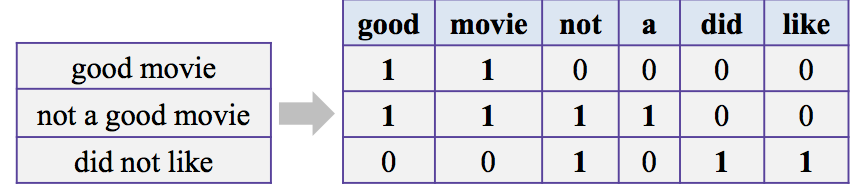

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [57]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [58]:
x_test_dtm.toarray().shape

(2579, 18123)

CountVectorizer has a few parameters you should know.

stop_words: Since CountVectorizer just counts the occurrences of each word in its vocabulary, extremely common words like ‘the’, ‘and’, etc. will become very important features while they add little meaning to the text. Your model can often be improved if you don’t take those words into account. Stop words are just a list of words you don’t want to use as features. You can set the parameter stop_words=’english’ to use a built-in list. Alternatively you can set stop_words equal to some custom list. This parameter defaults to None.

ngram_range: An n-gram is just a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram. Set the parameter ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features. The default ngram_range is (1,1). In a recent project where I modeled job postings online, I found that including 2-grams as features boosted my model’s predictive power significantly. This makes intuitive sense; many job titles such as ‘data scientist’, ‘data engineer’, and ‘data analyst’ are 2 words long.

min_df, max_df: These are the minimum and maximum document frequencies words/n-grams must have to be used as features. If either of these parameters are set to integers, they will be used as bounds on the number of documents each feature must be in to be considered as a feature. If either is set to a float, that number will be interpreted as a frequency rather than a numerical limit. min_df defaults to 1 (int) and max_df defaults to 1.0 (float).

max_features: This parameter is pretty self-explanatory. The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else.

You would set these parameters when initializing your CountVectorizer object as shown below.

In [59]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<7735x18123 sparse matrix of type '<class 'numpy.float64'>'
	with 66329 stored elements in Compressed Sparse Row format>

In [70]:
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [68]:
x_train_tfidf.toarray().shape

(7735, 18123)

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [73]:
# Train the model
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

# Predict and evaluate
predictions = model.predict(x_test_tfidf)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 0.8933695230709577


#### Using Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
# Initialize and train the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train_tfidf, y_train)

# Predict and evaluate
predictions = tree_model.predict(x_test_tfidf)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 0.9274912756882513


### Using Dense Model

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-09-04 03:00:39.635106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 03:00:39.635229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 03:00:39.790126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [78]:
# Build the Dense Neural Network model
dense_model = Sequential([
    Dense(64, input_shape=(x_train_tfidf.toarray().shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than 2 classes
])

# Compile the model
dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dense_model.fit(x_train_tfidf.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7790 - loss: 0.5662 - val_accuracy: 0.9347 - val_loss: 0.2515
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9539 - loss: 0.1759 - val_accuracy: 0.9709 - val_loss: 0.0870
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9935 - loss: 0.0349 - val_accuracy: 0.9696 - val_loss: 0.0834
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9978 - loss: 0.0144 - val_accuracy: 0.9748 - val_loss: 0.0703
Epoch 5/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9994 - loss: 0.0070 - val_accuracy: 0.9754 - val_loss: 0.0750
Epoch 6/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9988 - loss: 0.0099 - val_accuracy: 0.9741 - val_loss: 0.0740
Epoch 7/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9996 - loss: 0.0052 - val_accuracy: 0.9761 - val_loss: 0.0741
Epoch 8/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9997 - loss: 0.0044 - val_accu

In [80]:
dense_model.evaluate(x_test_tfidf.toarray(), y_test)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9678 - loss: 0.1346


[0.11002976447343826, 0.9709189534187317]

In [81]:
# Evaluate the model
y_pred = (dense_model.predict(x_test_tfidf.toarray()) > 0.5).astype("int32")  # Convert probabilities to binary output
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9709189608375339


### Using Conv 1D

In [83]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# Build the Conv1D Neural Network model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_tfidf.toarray().shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than 2 classes
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(x_train_tfidf.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 147s 752ms/step - accuracy: 0.7714 - loss: 0.5219 - val_accuracy: 0.9554 - val_loss: 0.1709
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 144s 741ms/step - accuracy: 0.9564 - loss: 0.1426 - val_accuracy: 0.9677 - val_loss: 0.0918
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 147s 757ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.9819 - val_loss: 0.0513
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 152s 782ms/step - accuracy: 0.9951 - loss: 0.0217 - val_accuracy: 0.9748 - val_loss: 0.0645
Epoch 5/10
 19/194 ━━━━━━━━━━━━━━━━━━━━ 2:09 738ms/step - accuracy: 0.9970 - loss: 0.0116

KeyboardInterrupt: 

In [84]:
# Evaluate the model
y_pred = (cnn_model.predict(x_test_tfidf.toarray()) > 0.5).astype("int32")  # Convert probabilities to binary output
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step
Accuracy: 0.9802248933695231


### Using LSTM

In [86]:
from tensorflow.keras.layers import LSTM

In [91]:
# Build the LSTM Neural Network model
lstm_model = Sequential([
    LSTM(32, input_shape=(x_train_tfidf.toarray().shape[1], 1), return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than 2 classes
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(x_train_tfidf.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
186/194 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.7755 - loss: 0.5918

KeyboardInterrupt: 

In [92]:
# Evaluate the model
y_pred = (lstm_model.predict(x_test_tfidf.toarray()) > 0.5).astype("int32")  # Convert probabilities to binary output
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

81/81 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step
Accuracy: 0.7797595967429236


### Embedding layer from tensorflow

In [95]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [156]:
# Example documents
documents = [
    "This is a sample document.",
    "This document is another example.",
    "TF-IDF is a text representation method."
]

# Example labels
labels = np.array([0, 1, 0])

# Tokenize the text data
tokenizer = Tokenizer( oov_token="<OOV>")
tokenizer.fit_on_texts(documents)
word_index = tokenizer.word_index

In [157]:
word_index

{'<OOV>': 1,
 'is': 2,
 'this': 3,
 'a': 4,
 'document': 5,
 'sample': 6,
 'another': 7,
 'example': 8,
 'tf': 9,
 'idf': 10,
 'text': 11,
 'representation': 12,
 'method': 13}

In [158]:
len(word_index.values())

13

In [159]:
# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(documents)

# Pad sequences to ensure equal length
padded_sequences = pad_sequences(sequences, padding='post')


In [160]:
padded_sequences

array([[ 3,  2,  4,  6,  5,  0,  0],
       [ 3,  5,  2,  7,  8,  0,  0],
       [ 9, 10,  2,  4, 11, 12, 13]], dtype=int32)

In [162]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

In [164]:
# Build the model
model = Sequential([
    Embedding(input_dim=2, output_dim=16),  # Embedding layer
    LSTM(64, return_sequences=False),  # LSTM layer
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [165]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.6894
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.6955
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6851
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6936
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.7104
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.6890
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.6982
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6936
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.6980
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.6868


In [166]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 7, 16)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,645 (268.15 KB)

 Trainable params: 22,881 (89.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,764 (178.77 KB)

In [167]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary output
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Accuracy: 0.0


#### Lets apply on our dataset

In [104]:
df

,review,Sentiment,Sentiment_encoded
0,real good moment missssssssss much,0,0
1,reading manga,0,0
2,comeagainjen,0,0
3,lapcat need send em accountant tomorrow odd...,0,0
4,add myspace myspacecomlookthunder,0,0
...,...,...,...
10309,depression g herbo mood im done stressi...,1,1
10310,depression succumbs brain makes feel l...,1,1
10311,ketamine nasal spray shows promise depression...,1,1
10312,dont mistake bad day depression everyone em,1,1


In [112]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'].values)
word_index = tokenizer.word_index


In [152]:
word_index

{'<OOV>': 1,
 'depression': 2,
 'im': 3,
 'good': 4,
 'love': 5,
 'day': 6,
 'like': 7,
 'get': 8,
 'laughing': 9,
 'loud': 10,
 'eyes': 11,
 'dont': 12,
 'tears': 13,
 'out': 14,
 'know': 15,
 'you': 16,
 'â\x80¦': 17,
 'go': 18,
 'going': 19,
 'thanks': 20,
 'anxiety': 21,
 'one': 22,
 'today': 23,
 'got': 24,
 'see': 25,
 'great': 26,
 'new': 27,
 'back': 28,
 'well': 29,
 'really': 30,
 'think': 31,
 'much': 32,
 'night': 33,
 'happy': 34,
 'cant': 35,
 'people': 36,
 'work': 37,
 'haha': 38,
 'amp': 39,
 'life': 40,
 'ill': 41,
 'twitter': 42,
 'hope': 43,
 'way': 44,
 'thank': 45,
 'thats': 46,
 '2': 47,
 'morning': 48,
 'need': 49,
 'would': 50,
 'youre': 51,
 'want': 52,
 'oh': 53,
 'fun': 54,
 'feel': 55,
 'make': 56,
 'still': 57,
 'right': 58,
 'hey': 59,
 'better': 60,
 'last': 61,
 'ive': 62,
 'everyone': 63,
 'home': 64,
 'nice': 65,
 'watching': 66,
 'best': 67,
 'never': 68,
 'tomorrow': 69,
 'us': 70,
 'gonna': 71,
 'come': 72,
 'getting': 73,
 'awesome': 74,
 'even': 

In [151]:
list(word_index.values())[22001] , list(word_index.keys())[20000]

(22002, 'consequence')

In [116]:
# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(df['review'].values)
sequences[:10]

[[114, 4, 424, 6287, 32],
 [389, 6288],
 [3086],
 [6289, 49, 460, 798, 6290, 69, 6291, 378, 75, 1851, 6292, 1486, 1126, 109],
 [318, 580, 6293],
 [1216, 4, 219, 101, 109],
 [6294, 6295, 89, 156, 179, 6296, 64, 243, 209, 1346],
 [1347, 6297, 799, 23, 65],
 [581, 3087, 1127, 6298],
 [6299, 33, 6300, 237, 759]]

In [118]:
# Pad sequences to ensure equal length
padded_sequences = pad_sequences(sequences, padding='post')
padded_sequences[:1]

array([[ 114,    4,  424, 6287,   32,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [121]:
padded_sequences.shape

(10314, 75)

In [120]:
# Convert labels to numpy array
labels = np.array(df['Sentiment'].values)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

In [143]:

# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16),  # Embedding layer
    LSTM(64, return_sequences=True),  # LSTM layer
    Dropout(0.2),
    LSTM(32, return_sequences=True), 
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than 2 classes
])

In [147]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 75, 16)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 75, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 75, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │        76,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 810,053 (3.09 MB)

 Trainable params: 270,017 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 540,036 (2.06 MB)

In [145]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.8154 - loss: 0.4164 - val_accuracy: 0.9931 - val_loss: 0.0336
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9921 - loss: 0.0325 - val_accuracy: 0.9820 - val_loss: 0.0487
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9956 - loss: 0.0172 - val_accuracy: 0.9896 - val_loss: 0.0499
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9951 - loss: 0.0254 - val_accuracy: 0.9903 - val_loss: 0.0516
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9984 - loss: 0.0075 - val_accuracy: 0.9875 - val_loss: 0.0622
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9986 - loss: 0.0083 - val_accuracy: 0.9875 - val_loss: 0.0868
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9917 - val_loss: 0.0521
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9948 - loss: 0.0237 - 

In [146]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary output
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step
Accuracy: 0.9922455573505654
